In [48]:
##import the required libraries and APIs
import numpy as np
import pandas as pd
import tensorflow as tf

print(tf.__version__)

2.10.0


In [49]:
data = pd.read_json("./data/x1.json")
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [50]:
##create arrays to store the headlines and labels
headlines = list(data['headline'])
labels = list(data['is_sarcastic'])
text_dataset = tf.data.Dataset.from_tensor_slices(headlines)

In [51]:
##define the parameters for tokenizing and padding
vocab_size = 10000
embedding_dim = 32
max_length = 120
padding_type = 'post'
trunc_type='post'
oov_tok = "<OOV>"
training_size = 24000

In [52]:
##create the text vectorization layer and create the vocab
vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=vocab_size, standardize='lower_and_strip_punctuation', split='whitespace', output_mode='int', output_sequence_length=max_length)

vectorize_layer.adapt(text_dataset.batch(64))

In [53]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_12 (Text  (None, 120)              0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 120, 32)           320000    
                                                                 
 bidirectional_4 (Bidirectio  (None, 120, 256)         164864    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                      

In [55]:
##training set from 0 to training size
training_sentences = headlines[0:training_size]
training_labels = labels[0:training_size]

##testing set from training size to the end
testing_sentences = headlines[training_size:]
testing_labels = labels[training_size:]

In [56]:
num_epochs = 10
history = model.fit(
    training_sentences, 
    training_labels, 
    epochs=num_epochs, 
    validation_data=(testing_sentences, testing_labels)
    )

Epoch 1/10
750/750 [==============================] - 196s 254ms/step - loss: 0.3960 - accuracy: 0.8150 - val_loss: 0.3208 - val_accuracy: 0.8591
Epoch 2/10
750/750 [==============================] - 249s 333ms/step - loss: 0.2327 - accuracy: 0.9071 - val_loss: 0.3440 - val_accuracy: 0.8545
Epoch 3/10
750/750 [==============================] - 252s 335ms/step - loss: 0.1491 - accuracy: 0.9431 - val_loss: 0.3674 - val_accuracy: 0.8554
Epoch 4/10
750/750 [==============================] - 247s 330ms/step - loss: 0.0859 - accuracy: 0.9698 - val_loss: 0.4472 - val_accuracy: 0.8539
Epoch 5/10
750/750 [==============================] - 249s 332ms/step - loss: 0.0496 - accuracy: 0.9838 - val_loss: 0.5605 - val_accuracy: 0.8426
Epoch 6/10
750/750 [==============================] - 252s 337ms/step - loss: 0.0320 - accuracy: 0.9897 - val_loss: 0.6124 - val_accuracy: 0.8515
Epoch 7/10
750/750 [==============================] - 251s 334ms/step - loss: 0.0265 - accuracy: 0.9912 - val_loss: 0.7142 -

## Visualise the accuracy and loss

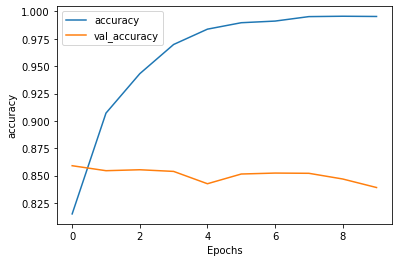

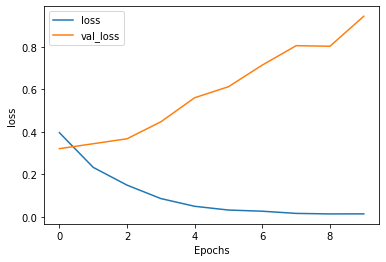

In [57]:
import matplotlib.pyplot as plt


def plot_metrics(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()
  
plot_metrics(history, "accuracy")
plot_metrics(history, "loss")

## Classify new reviews

In [58]:
sentence = ["the baby boy fears spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
print(model.predict(sentence))

1/1 [==============================] - 1s 1s/step
[[2.7460430e-05]
 [1.4347495e-01]]


In [64]:
model.save('C:\\Users\\ftn0813\\Documents\\GitHub\\ScannerBackEnd\\ScannerBackEndHTTP\\saved_tensorflow_model')

INFO:tensorflow:Assets written to: C:\Users\ftn0813\Documents\GitHub\ScannerBackEnd\ScannerBackEndHTTP\saved_tensorflow_model\assets


INFO:tensorflow:Assets written to: C:\Users\ftn0813\Documents\GitHub\ScannerBackEnd\ScannerBackEndHTTP\saved_tensorflow_model\assets


In [65]:
loaded_model = tf.keras.models.load_model('C:\\Users\\ftn0813\\Documents\\GitHub\\ScannerBackEnd\\ScannerBackEndHTTP\\saved_tensorflow_model')

In [68]:
new_data = tf.data.Dataset.from_tensor_slices(sentence)
result_array = loaded_model.predict(new_data.batch(16))
for result in result_array:
    print(round(result[0]))

1/1 [==============================] - 0s 126ms/step
0
0
